## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Data

In [2]:
file_path = "results/"

ridge_df = pd.read_csv(file_path + "ridge_result_df.csv")
gbm_df = pd.read_csv(file_path + "lightGBM_results_full.csv")
lasso_df = pd.read_csv(file_path + "Lasso Rolling Backtest Results.csv")
trans_df = pd.read_csv(file_path + "transformer_backtest_results_Huber_final.csv")

In [3]:
ridge_df

,datetime,symbol,predicted_log_return,actual_log_return,weight_relative,weight_sign
0,2025-04-29 15:59:00,AMAT,-0.000307,-0.014007,0.000000,-1.0
1,2025-04-29 15:59:00,AMD,-0.000044,-0.006581,0.000000,-1.0
2,2025-04-29 15:59:00,AVGO,-0.000359,-0.008008,0.000000,-1.0
3,2025-04-29 15:59:00,MU,0.000013,-0.019444,1.000000,1.0
4,2025-04-29 15:59:00,NVDA,-0.000320,-0.025525,0.000000,-1.0
...,...,...,...,...,...,...
99744,2025-10-28 15:58:00,AMAT,0.000194,-0.000132,0.061321,1.0
99745,2025-10-28 15:58:00,AMD,0.000268,-0.001316,0.084617,1.0
99746,2025-10-28 15:58:00,AVGO,0.000898,0.000375,0.283711,1.0
99747,2025-10-28 15:58:00,MU,0.001046,-0.000135,0.330421,1.0


In [4]:
gbm_df

,datetime,symbol,predicted_log_return,actual_log_return,weight_relative,weight_sign,pnl_sample_sign,pnl_sample_relative
0,2025-04-29 15:59:00,AMAT,-0.000121,-0.014007,0.000000,-1.0,0.014007,-0.000000
1,2025-04-29 15:59:00,AMD,-0.000194,-0.006581,0.000000,-1.0,0.006581,-0.000000
2,2025-04-29 15:59:00,AVGO,-0.000019,-0.008008,0.000000,-1.0,0.008008,-0.000000
3,2025-04-29 15:59:00,MU,0.000106,-0.019444,0.397970,1.0,-0.019444,-0.007738
4,2025-04-29 15:59:00,NVDA,0.000160,-0.025525,0.602030,1.0,-0.025525,-0.015367
...,...,...,...,...,...,...,...,...
99744,2025-10-28 15:58:00,AMAT,-0.000343,-0.000132,0.000000,-1.0,0.000132,-0.000000
99745,2025-10-28 15:58:00,AMD,-0.000087,-0.001316,0.000000,-1.0,0.001316,-0.000000
99746,2025-10-28 15:58:00,AVGO,0.000208,0.000375,0.336141,1.0,0.000375,0.000126
99747,2025-10-28 15:58:00,MU,0.000293,-0.000135,0.474151,1.0,-0.000135,-0.000064


In [5]:
lasso_df

,datetime,symbol,predicted_log_return,actual_log_return,weight_relative,weight_sign
0,2025-04-29 15:59:00,AMAT,0.001567,-0.014007,0.155424,1.0
1,2025-04-29 15:59:00,AMD,0.004571,-0.006581,0.453262,1.0
2,2025-04-29 15:59:00,AVGO,0.002464,-0.008008,0.244344,1.0
3,2025-04-29 15:59:00,MU,0.001190,-0.019444,0.118016,1.0
4,2025-04-29 15:59:00,NVDA,0.000292,-0.025525,0.028953,1.0
...,...,...,...,...,...,...
99744,2025-10-28 15:58:00,AMAT,0.001153,-0.000132,0.126740,1.0
99745,2025-10-28 15:58:00,AMD,0.003100,-0.001316,0.340594,1.0
99746,2025-10-28 15:58:00,AVGO,0.001651,0.000375,0.181394,1.0
99747,2025-10-28 15:58:00,MU,0.002252,-0.000135,0.247416,1.0


In [6]:
trans_df

,datetime,symbol,predicted_return,position,actual_log_return,weight_relative,weight_sign
0,2025-04-29 15:59:00,AMD,0.000019,0.019483,-0.006581,0.253978,1.0
1,2025-04-29 15:59:00,MU,0.000018,0.018026,-0.019444,0.234991,1.0
2,2025-04-29 15:59:00,NVDA,0.000016,0.015607,-0.025525,0.203454,1.0
3,2025-04-29 15:59:00,AVGO,0.000014,0.013713,-0.008008,0.178765,1.0
4,2025-04-29 15:59:00,AMAT,0.000010,0.009881,-0.014007,0.128811,1.0
...,...,...,...,...,...,...,...
91194,2025-10-28 15:58:00,MU,0.000031,0.030555,-0.000135,0.386497,1.0
91195,2025-10-28 15:58:00,AMD,0.000016,0.016067,-0.001316,0.203232,1.0
91196,2025-10-28 15:58:00,NVDA,0.000015,0.014636,-0.000025,0.185135,1.0
91197,2025-10-28 15:58:00,AVGO,0.000011,0.010583,0.000375,0.133862,1.0


In [7]:
trans_df.rename(columns={'predicted_return': 'predicted_log_return'}, inplace=True)

## Combine All Model Results

In [8]:
def prepare_model_df(df, model_name):
    return (
        df[['datetime', 'symbol', 'predicted_log_return', 'actual_log_return', 'weight_relative', 'weight_sign']]
        .assign(model=model_name)
    )

ridge_df_clean = prepare_model_df(ridge_df, 'ridge')
gbm_df_clean   = prepare_model_df(gbm_df, 'lightgbm')
lasso_df_clean = prepare_model_df(lasso_df, 'lasso')
trans_df_clean = prepare_model_df(trans_df, 'transformer')

result_df = pd.concat([ridge_df_clean, gbm_df_clean, lasso_df_clean, trans_df_clean], ignore_index=True)

result_df

,datetime,symbol,predicted_log_return,actual_log_return,weight_relative,weight_sign,model
0,2025-04-29 15:59:00,AMAT,-0.000307,-0.014007,0.000000,-1.0,ridge
1,2025-04-29 15:59:00,AMD,-0.000044,-0.006581,0.000000,-1.0,ridge
2,2025-04-29 15:59:00,AVGO,-0.000359,-0.008008,0.000000,-1.0,ridge
3,2025-04-29 15:59:00,MU,0.000013,-0.019444,1.000000,1.0,ridge
4,2025-04-29 15:59:00,NVDA,-0.000320,-0.025525,0.000000,-1.0,ridge
...,...,...,...,...,...,...,...
390441,2025-10-28 15:58:00,MU,0.000031,-0.000135,0.386497,1.0,transformer
390442,2025-10-28 15:58:00,AMD,0.000016,-0.001316,0.203232,1.0,transformer
390443,2025-10-28 15:58:00,NVDA,0.000015,-0.000025,0.185135,1.0,transformer
390444,2025-10-28 15:58:00,AVGO,0.000011,0.000375,0.133862,1.0,transformer


In [9]:
print(result_df['predicted_log_return'].describe())

count    390446.000000
mean         -0.000001
std           0.000517
min          -0.014446
25%          -0.000148
50%           0.000005
75%           0.000149
max           0.017298
Name: predicted_log_return, dtype: float64


## Calculate Sharp Ratio

In [10]:
# Annualization factor (minute level)
N = 252 * 390

# Annual SR
def sharpe_ratio(pnl, annualize=True):
    mu = pnl.mean()
    sigma = pnl.std(ddof=1)
    if sigma == 0:
        return 0.0
    sr = mu / sigma
    if annualize:
        sr *= np.sqrt(N)
    return sr

# Raw SR
def raw_sharpe(pnl):
    mu = pnl.mean()
    sigma = pnl.std(ddof=1)
    return 0.0 if sigma == 0 else mu / sigma

# pnl
result_df['pnl'] = result_df['predicted_log_return'] * result_df['weight_relative']

# aggregate by model and datetime
pnl_by_model = (
    result_df
    .groupby(['model', 'datetime'])['pnl']
    .sum()
    .reset_index()
)

# Raw & Annualized Sharpe
sharpes_raw = pnl_by_model.groupby('model')['pnl'].apply(raw_sharpe)
sharpes_ann = pnl_by_model.groupby('model')['pnl'].apply(lambda x: sharpe_ratio(x, annualize=True))

print("Raw Sharpe (used for weight calculation:)")
print(sharpes_raw.round(3))
print("\nAnnualized Sharpe:")
print(sharpes_ann.round(3))

Raw Sharpe (used for weight calculation:)
model
lasso          0.917
lightgbm       1.008
ridge          0.791
transformer    2.041
Name: pnl, dtype: float64

Annualized Sharpe:
model
lasso          287.614
lightgbm       316.070
ridge          248.014
transformer    639.723
Name: pnl, dtype: float64


## Calculate Model Weight Based On SR

In [11]:
pred_pivot = result_df.pivot_table(index=['datetime'], columns='model', values='predicted_log_return')

pred_pivot = pred_pivot.dropna()

weights_signal = pred_pivot.abs()
weights_signal = weights_signal.div(weights_signal.sum(axis=1), axis=0)
weights_signal


model,lasso,lightgbm,ridge,transformer
datetime,,,,
2025-04-29 15:59:00,0.896664,0.006088,0.090426,0.006821
2025-04-30 13:20:00,0.507217,0.464980,0.026607,0.001196
2025-04-30 13:21:00,0.323190,0.580642,0.095981,0.000187
2025-04-30 13:22:00,0.179518,0.558278,0.255997,0.006207
2025-04-30 13:23:00,0.540046,0.194495,0.260796,0.004663
...,...,...,...,...
2025-10-28 15:54:00,0.504857,0.347210,0.119742,0.028191
2025-10-28 15:55:00,0.709542,0.202686,0.082225,0.005547
2025-10-28 15:56:00,0.510972,0.176929,0.303210,0.008889


## Calculate Ensemble Prediction

In [ ]:
# pivot data
pred_pivot = (
    result_df
    .pivot_table(index=['datetime', 'symbol'], columns='model', values='predicted_log_return')
)

# Align weights (by datetime)
pred_pivot = pred_pivot.merge(
    weights_signal,
    left_on='datetime',
    right_index=True,
    suffixes=('', '_weight'),
    how='left'
)

# Dynamically weighted summation
def weighted_sum(row):
    total = 0
    for model in ['lasso', 'lightgbm', 'ridge', 'transformer']:
        total += row[model] * row[f'{model}_weight']
    return total

pred_pivot['ensemble_predicted_log_return'] = pred_pivot.apply(weighted_sum, axis=1)

# rearrange format
ensemble_pred = pred_pivot.reset_index()[['datetime', 'symbol', 'ensemble_predicted_log_return']]

# calculate long-only weight_relative
ensemble_pred['positive_prediction'] = ensemble_pred['ensemble_predicted_log_return'].clip(lower=0)
minute_sum = ensemble_pred.groupby('datetime')['positive_prediction'].transform('sum')
ensemble_pred['ensemble_weight_relative'] = np.where(
    minute_sum == 0, 0,
    ensemble_pred['positive_prediction'] / minute_sum
)
ensemble_pred = ensemble_pred.drop(columns=['positive_prediction'])
ensemble_pred = ensemble_pred.dropna()

ensemble_pred


model,datetime,symbol,ensemble_predicted_log_return,ensemble_weight_relative
0,2025-04-29 15:59:00,AMAT,0.001377,0.153841
1,2025-04-29 15:59:00,AMD,0.004093,0.457352
2,2025-04-29 15:59:00,AVGO,0.002177,0.243227
3,2025-04-29 15:59:00,MU,0.001069,0.119440
4,2025-04-29 15:59:00,NVDA,0.000234,0.026140
...,...,...,...,...
99744,2025-10-28 15:58:00,AMAT,0.000881,0.118940
99745,2025-10-28 15:58:00,AMD,0.002317,0.312674
99746,2025-10-28 15:58:00,AVGO,0.001429,0.192776
99747,2025-10-28 15:58:00,MU,0.001904,0.256876


## Save Model Weights & Ensemble Predictions

In [13]:
weights_signal.reset_index().to_csv("results/model_weights.csv", index=False)

ensemble_pred.to_csv("results/ensemble_predictions.csv", index=False)

print("Saved：")
print("1. model_weights.csv")
print("2. ensemble_predictions.csv")


Saved：
1. model_weights.csv
2. ensemble_predictions.csv


## Model Performance Visualization

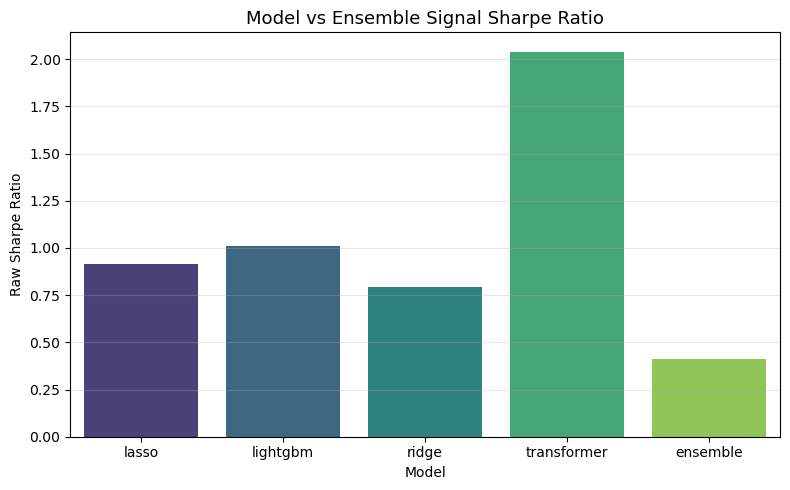

In [14]:
ensemble_pred['pnl'] = ensemble_pred['ensemble_predicted_log_return'] * ensemble_pred['ensemble_weight_relative']
ensemble_sharpe = raw_sharpe(ensemble_pred['pnl'])

sharpes_all = sharpes_raw.copy()
sharpes_all['ensemble'] = ensemble_sharpe


plt.figure(figsize=(8,5))
sns.barplot(
    x=sharpes_all.index,
    y=sharpes_all.values,
    hue=sharpes_all.index,
    palette='viridis',
    legend=False 
)
plt.title("Model vs Ensemble Signal Sharpe Ratio", fontsize=13)
plt.ylabel("Raw Sharpe Ratio")
plt.xlabel("Model")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



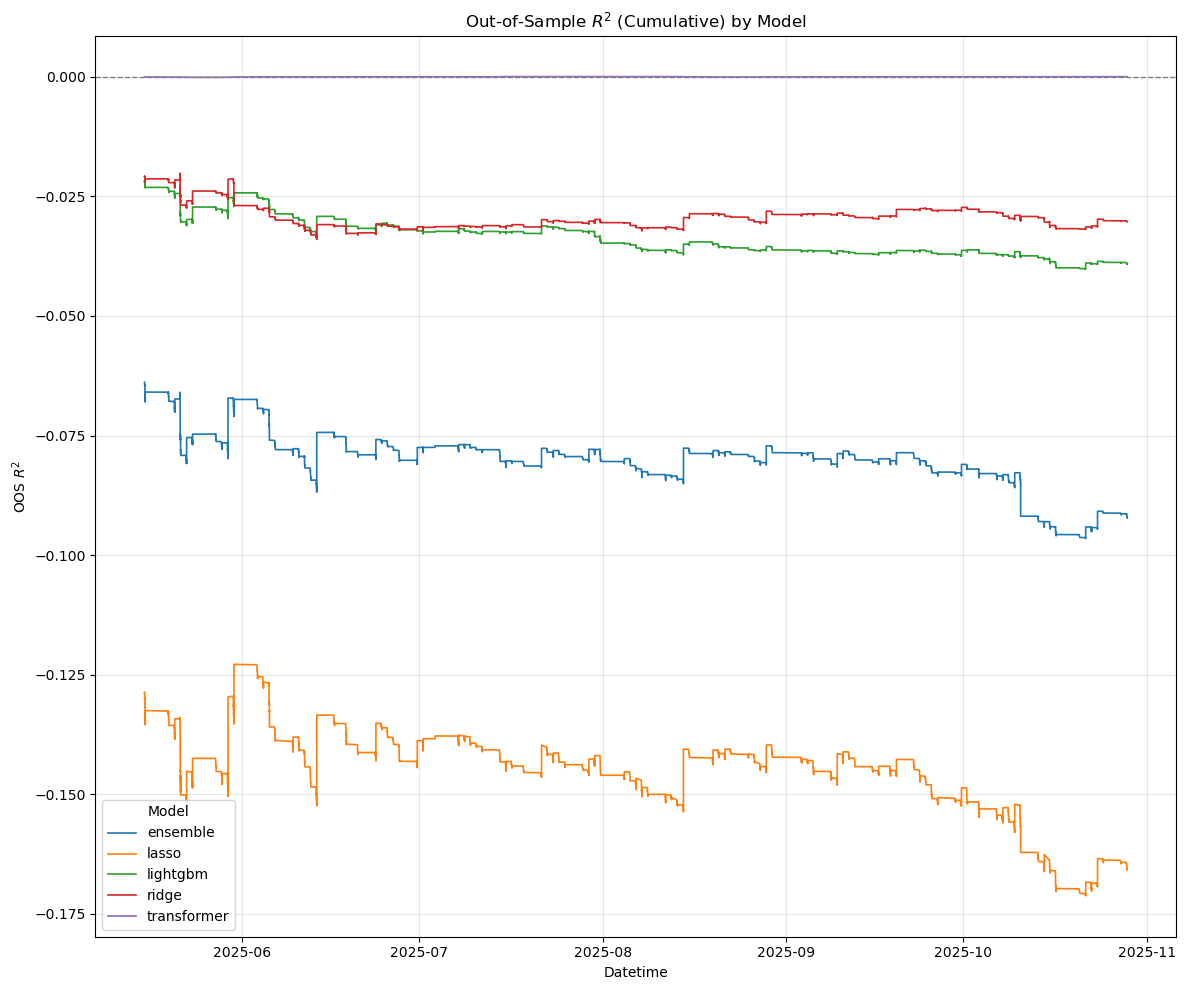

In [15]:
df = result_df.copy()
df['datetime'] = pd.to_datetime(df['datetime'])

ens = ensemble_pred.copy()
ens['datetime'] = pd.to_datetime(ens['datetime'])

df_actual = df[['datetime', 'symbol', 'actual_log_return']].drop_duplicates()
ens = ens.merge(df_actual, on=['datetime', 'symbol'], how='left')

df_agg = (
    df.groupby(['model', 'datetime'])
      .agg({'predicted_log_return': 'mean',
            'actual_log_return': 'mean'})
      .reset_index()
)

ens_agg = (
    ens.groupby('datetime')
       .agg({'ensemble_predicted_log_return': 'mean',
             'actual_log_return': 'mean'})
       .reset_index()
)
ens_agg = ens_agg.rename(columns={'ensemble_predicted_log_return': 'predicted_log_return'})
ens_agg['model'] = 'ensemble'

df_agg_all = pd.concat([df_agg, ens_agg], ignore_index=True)

df_agg_all['naive_pred'] = 0.0

oos_list = []
for m, sub in df_agg_all.groupby('model'):
    sub = sub.sort_values('datetime')
    err_model = (sub['actual_log_return'] - sub['predicted_log_return'])**2
    err_naive = (sub['actual_log_return'] - sub['naive_pred'])**2
    cum_err_model = err_model.cumsum()
    cum_err_naive = err_naive.cumsum()
    sub['OOS_R2'] = 1 - cum_err_model / cum_err_naive.replace(0, np.nan)
    oos_list.append(sub)

oos_df = pd.concat(oos_list, ignore_index=True)
oos_df = oos_df[oos_df['datetime'] > '2025-05-15']

plt.figure(figsize=(12, 10))
for m, sub in oos_df.groupby('model'):
    plt.plot(sub['datetime'], sub['OOS_R2'], label=m, linewidth=1.2)

plt.axhline(0, color='grey', ls='--', lw=1)
plt.title("Out-of-Sample $R^2$ (Cumulative) by Model")
plt.ylabel("OOS $R^2$")
plt.xlabel("Datetime")
plt.legend(title="Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [18]:
oos_last = (
    oos_df.sort_values('datetime')
          .groupby('model')
          .tail(1)[['model', 'OOS_R2']]
          .set_index('model')['OOS_R2']
)

oos_mean = (
    oos_df.groupby('model')['OOS_R2']
          .mean()
)

print("Final OOS R2 by model:")
print(oos_last)
print("\nAverage OOS R2 by model:")
print(oos_mean)

Final OOS R2 by model:
model
ridge         -0.030336
ensemble      -0.092247
lightgbm      -0.039175
lasso         -0.165797
transformer    0.000036
Name: OOS_R2, dtype: float64

Average OOS R2 by model:
model
ensemble      -0.080627
lasso         -0.146230
lightgbm      -0.033878
ridge         -0.029552
transformer    0.000004
Name: OOS_R2, dtype: float64
